# Entevista de emprego: Cientista de Dados
Disciplina: Probabilidade, Universidade Federal do Rio Grande do Norte ([UFRN](http://http://www.ufrn.br))

### Autor:
[Oziel Alves](https://github.com/ozielalves)

### Descrição:
Nesta entrevista, o dataset com os resultados da [Mega-sena](https://pt.wikipedia.org/wiki/Mega-Sena) será explorado e analisado no objetivo de melhor explanar os números, de modo a deixar claro o funcionamento analítico do jogo. As informações serão trazidas ao ambiente comum, o que tornará claro o entendimento do leitor a respeito do referente dataset.


In [37]:
# A entrada de dados será realizada, importaremos a biblioteca pandas para a leitrua do arquivo, assim como também 
# importaremos a biblioteca matplotlib para um futuro esboço de gráficos.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
excel = pd.ExcelFile('basedados.xlsx')
print (excel.sheet_names)

data = excel.parse(0)

data.head()

['MegaSena']


,Concurso,Data Sorteio,Dezena1,Dezena2,Dezena3,Dezena4,Dezena5,Dezena6,Arrecadacao_Total,Ganhadores_Sena,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio
0,1,1996-03-11,41,5,4,52,30,33,0.0,0,0.00,17,39158.92,2016,330.21,SIM,1714650.23,0
1,2,1996-03-18,9,39,37,49,43,41,0.0,1,2307162.23,65,14424.02,4488,208.91,NÃO,0.00,0
2,3,1996-03-25,36,30,10,11,29,47,0.0,2,391192.51,62,10515.93,4261,153.01,NÃO,0.00,0
3,4,1996-04-01,6,59,42,27,1,5,0.0,0,0.00,39,15322.24,3311,180.48,SIM,717080.75,0
4,5,1996-04-08,1,19,46,6,16,2,0.0,0,0.00,98,5318.10,5399,96.53,SIM,1342488.85,0


In [34]:
# Para saber o range de dados que estmaos lidando, iremos contar o numero de Concursos da coluna 'Concursos'.
# Podemos analisar que ao todo foram analisados 2025 concursos, isto é, 2025 edições da Mega-Sena desde o seu 
# lançamento.

Qtd_concursos = len(data['Data Sorteio'].unique())

print('Ao todo foram analisados neste dataset:', Qtd_concursos, 'Concursos')

Ao todo foram analisados neste dataset: 2025 Concursos


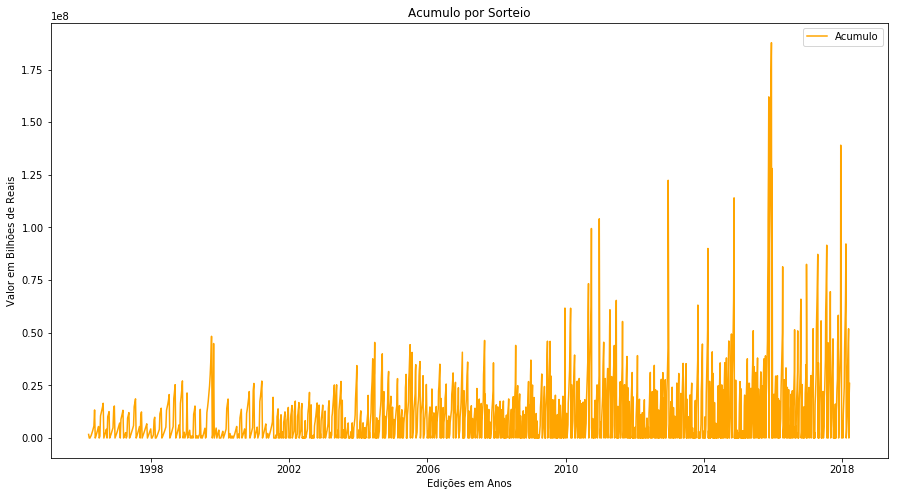

In [191]:
# O Acumulo na Mega-Sena se da quando não há ganhadores nos determinados tipos de sorteios semanais
# No gráfico podemos perceber que houve um elevado crescimento no Valor acumulado desde a criação do concurso.
# O pico entre 2014 e 2018 representa justamente o período em que houve o maior prêmio da história da Mega-Sena

fig = plt.figure(figsize=(15,8))
plt.plot(data['Data Sorteio'], data['Valor_Acumulado'], c='orange', label='Acumulo')
plt.ylabel('Valor em Bilhões de Reais')
plt.xlabel('Edições em Anos')
plt.legend(loc='upper right')
plt.title('Acumulo por Sorteio')
plt.show()

In [84]:
# Com o dado gráfico conseguimos analisar a elevação nos valores acumulados, todavida também podemos observar através 
# de uma contagem de acumulo a percentagem de concrusos acumulados.
# Com 76% dos concursos acumulados, a Mega-Sena se torna o jogo de sorte mais bem remunerável aos "pés-quentes".

Acumulo = 0;
for x in data.Acumulado:
    if x == 'SIM':
        Acumulo += 1
        
print("Quantidade de concursos: ", Qtd_concursos)        
print("Quantidade de concursos acumulados: ", Acumulo)

print ("Porcentagem de acumulo: ", str(int (Acumulo*100/len(data.Concurso))) + '%')

Quantidade de concursos:  2025
Quantidade de concursos acumulados:  1548
Porcentagem de acumulo:  76%


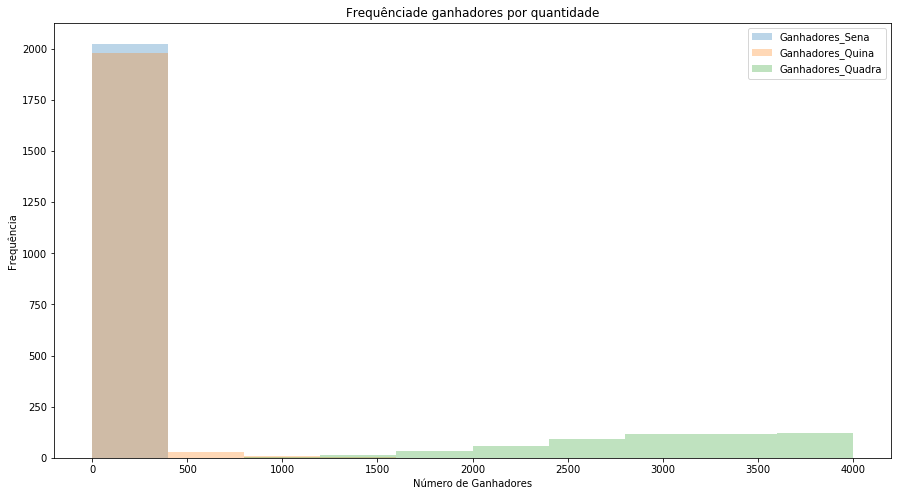

In [325]:
# Como podemos observar no grafíco é bastante comum não haver nenhum ganhador para a Sena, o que implica na grande 
# facilidade de acumulo e estatísticamente falando, na facilidade de haver ganhadores na Quina e na quadra.

plt.savefig("image.png",bbox_inches='tight',dpi=100)
cols = ['Ganhadores_Sena','Ganhadores_Quina','Ganhadores_Quadra']
ganhadores = data.copy()
winners = ganhadores[cols]
fig = winners.plot(kind = 'hist', range=(0,4000), alpha=0.3, figsize=(15,8))
plt.title("Frequênciade ganhadores por quantidade")
plt.xlabel("Número de Ganhadores")
plt.ylabel("Frequência")
plt.show()

In [316]:
# Através destes dados estatísticos podemos representar de melhor forma a estatística de êxito na Mega-Sena
# É fácil notar a maior facilidade de acertar as 4 dezenas da quadra, isto está refletido visualmente no gráfico e em
# censo nos números abaixo.

Numero_ganhadores = winners.sum()
print("Número de ganhadores por tipo: \n\n", Numero_ganhadores)
Soma_Numero_Ganhadores = Numero_ganhadores.sum()
print("\nNúmero total de ganhadores: ",Soma_Numero_Ganhadores)
Ganhadores_por_edc = (Numero_ganhadores/Qtd_concursos)
print("\nMédia de Ganhadores por Edição em tipos: \n\n", round(Ganhadores_por_edc,2))

Número de ganhadores por tipo: 

 Ganhadores_Sena           691
Ganhadores_Quina       228775
Ganhadores_Quadra    14744770
dtype: int64

Número total de ganhadores:  14974236

Média de Ganhadores por Edição em tipos: 

 Ganhadores_Sena         0.34
Ganhadores_Quina      112.98
Ganhadores_Quadra    7281.37
dtype: float64


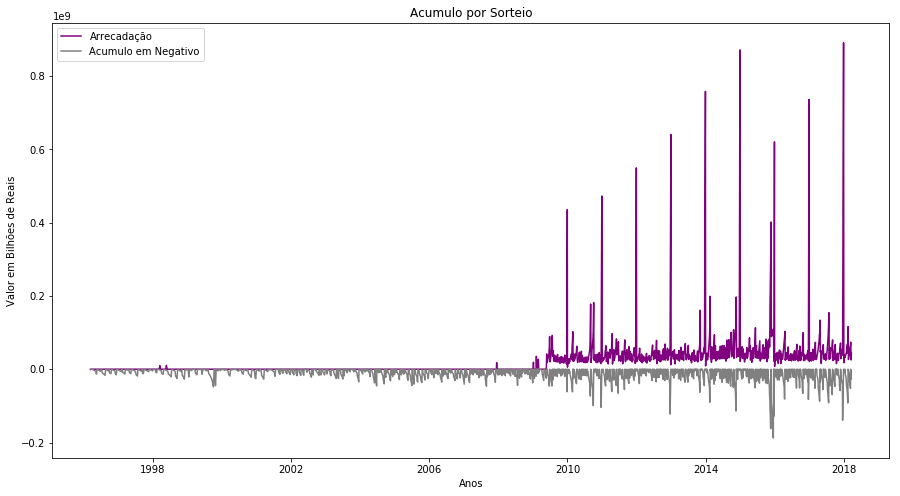

In [342]:
# Para uma melhor observação, o gráfico que representa o Acumulo foi invertido.
# Através desta comaparação podemos perceber a discrepância nos valores arrecadados com os concursos e os valores 
# acumulados antes vistos como absurdos.
# É inegável que o montante final obtido com a Mega-Sena é estupidamente positivo se comparado a o valor que um
# possível ganhador possa receber se chegar a obter êxito no concurso.

colun = ['Arrecadacao_Total', 'Valor_Acumulado']
data_y = data.copy()
data_y = data_y[colun]
colors = ['red', 'black', 'green', 'orange', 'blue']

fig = plt.figure(figsize=(15,8))

plt.plot(data['Data Sorteio'] , data['Arrecadacao_Total'], c='purple', label= 'Arrecadação')
plt.plot(data['Data Sorteio'], 100-data['Valor_Acumulado'], c='gray', label='Acumulo em Negativo')
plt.ylabel('Valor em Bilhões de Reais')
plt.xlabel('Anos')
plt.legend(loc='upper left')
plt.title('Acumulo por Sorteio')
plt.show()

In [375]:
# Com estes dados podemos perceber que ainda que atribuidas a um vencedor as médias das maiores premiações possíveis 
# do concurso, a Caixa Econômica Federal, Orgão público responsável pelas edições, ainda teria como lucro 4 milhôes 
# 370 mil 619 reais, isto é, em uma situação hipotética e se tratando de um prêmio estatísticamente de probabilidade
# de ganho: 1 em 50.063.860, que corresponde a 0,000002% de chance de ganhar.
# 
# O que prova o sucesso economico do concurso

premio = data.copy()
premio['Maior_Premio'] = data['Ganhadores_Sena'] * data ['Rateio_Sena'] 

M_premio_acumulado = round(data.Valor_Acumulado.mean(),2)
M_arrecadacao_total = round(data.Arrecadacao_Total.mean(),2)
M_premio_maximo = round(premio.Maior_Premio.mean(),2)

print("Média de Prêmio acumulado: ", M_premio_acumulado)
print("Média de Arrecadação Total: ", M_arrecadacao_total)
print("Média de premio Máximo: ", M_premio_maximo)

Lucro_caixa = round(M_arrecadacao_total - M_premio_acumulado - M_premio_maximo, 2)

print("Lucro da caixa economica: ", Lucro_caixa)

#plt.plot(data['Data Sorteio'], data['Valor_Acumulado'])

Média de Prêmio acumulado:  12334568.12
Média de Arrecadação Total:  22673370.78
Média de premio Máximo:  5968183.42
Lucro da caixa economica:  4370619.24


Os 6 números mais jogados por frequência: 

 5     233
53    230
10    227
23    224
4     224
54    221
dtype: int64


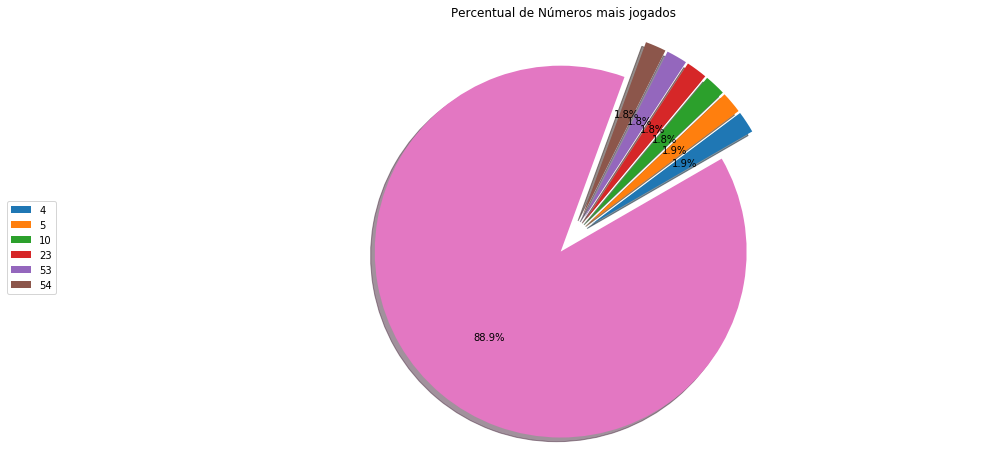


Continuação: Numeros jogados por frequência: 

 51    220
24    220
33    219
17    218
52    217
28    217
42    216
32    215
30    213
43    212
16    211
41    210
34    210
50    209
2     209
13    209
36    208
29    207
37    207
56    207
27    206
44    205
6     204
1     202
8     202
59    201
45    201
18    201
47    200
49    200
35    200
12    199
38    197
20    195
58    195
11    195
31    194
46    193
40    191
3     191
7     191
60    190
48    190
14    189
39    188
57    188
19    186
25    184
9     183
15    183
21    178
22    177
55    174
26    164
dtype: int64


In [380]:
# Bom, Apesar de ser um jogo de sorte, em estatística é ainda é possivel pensar em jogas inteligentes.
# Podemos contar os numeros jogados em cada dezena para saber qual seria o palpite de ouro para uma jogada na Mega-Sena
# Os 6 números mais jogados durante as edições seriam um bom palpite de jogada, visto que analíticamente falando,
# representam uma maior margem de acerto. Lembre-se de evitar apostar nos números azarados, ou seja, os menos jogados,
# para assim aumentar suas chances de ganhar.
# Boa sorte!

colls = ['Dezena1','Dezena2','Dezena3','Dezena4','Dezena5','Dezena6']
dezenas = data.copy()
dez = dezenas[colls]
dez = dez.unstack().value_counts()

print("Os 6 números mais jogados por frequência: \n\n",dez[:6])

dez_sum = data.Dezena1.value_counts() + data.Dezena2.value_counts() + data.Dezena3.value_counts() + data.Dezena4.value_counts() + data.Dezena5.value_counts()+ data.Dezena6.value_counts()

sizes = [dez_sum.sort_values(ascending=False).iloc[1], dez_sum.sort_values(ascending=False).iloc[2], 
        dez_sum.sort_values(ascending=False).iloc[3], dez_sum.sort_values(ascending=False).iloc[4], 
        dez_sum.sort_values(ascending=False).iloc[5], dez_sum.sort_values(ascending=False).iloc[6],
        dez_sum.sort_values(ascending=False).iloc[6:].sum()]

explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
labels = dez_sum.sort_values(ascending=False).index[:6].sort_values()
fig = plt.figure(figsize=(15,8))
plt.pie(sizes, explode=explode, autopct='%1.1f%%',shadow=True, startangle=30, radius=0.9)
plt.axis('equal')
plt.legend(loc='best',labels=labels, bbox_to_anchor=(-0.1,0.6))
plt.title("Percentual de Números mais jogados")
plt.show()

print("\nContinuação: Numeros jogados por frequência: \n\n",dez[6:])